<a href="https://colab.research.google.com/github/Namit-Joshi/Sentiment-Analysis/blob/master/TwitterSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [1]:
# !pip install python-twitter

In [2]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

# **Keys for accessing the Twitter API using tweepy**

In [3]:
consumerKey = 'VHZaxAgsQL0iJ8sVq02lszFvo'
consumerSecret = 'zJ5eJQQxTmKGUa04FNzDNm4CfJ60jTnFmGXcs2bqmUtp01jw77'
accessToken = '961912425053224960-Keu8couwpni60P7gUVcc5kNYtzh2x5h'
accessTokenSecret = 'FJKHL884bBYzbXoJ2QpzGqHuc3bRIBX6l9I7Zmv56Dg38'

In [4]:
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) # Twitter requires all requests to use OAuth for authentication.
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

The limit for the Search API is 180 Requests per 15 mins window for per-user authentication


```
wait_on_rate_limit = True
```
I have set the wait_on_rate_limit flag to true. What this does is make the Tweepy API call auto wait (sleep) when it hits the rate limit and continue upon expiry of the window. This avoids to have to program this part manually, which makes the program much more simple and elegant.

# **Extracting Tweets from a User**

In [5]:
# Extract 100 tweets from the twitter user --- Elon Musk
posts = api.user_timeline(screen_name="elonmusk", count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) @PPathole @universal_sci This might sting a little …

2) @PPathole The “early investor” part of Tesla is wrong. That bs has been pushed by Eberhard (worst person I’ve ever worked with and that’s saying something!) for years.

3) @universal_sci Also, there could be long period comets that intersect Earth right now. We just haven’t observed them during humanity’s (very short) recorded history. Comet S-L 9 punched a roughly Earth-sized hole in Jupiter. https://t.co/ne7DM0YAXX

4) @universal_sci Pretty much

5) Cybertruck option package https://t.co/6Vz4XNoHf9



In [6]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df.head()

,Tweets
0,@PPathole @universal_sci This might sting a li...
1,@PPathole The “early investor” part of Tesla i...
2,"@universal_sci Also, there could be long perio..."
3,@universal_sci Pretty much
4,Cybertruck option package https://t.co/6Vz4XNoHf9


# **Cleaning the Tweets**

In [7]:
#Function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)
df

,Tweets
0,_sci This might sting a little …
1,The “early investor” part of Tesla is wrong. ...
2,"_sci Also, there could be long period comets t..."
3,_sci Pretty much
4,Cybertruck option package
...,...
95,"And why aim your attacks at Tesla, when we’re..."
96,That bs was pushed by oil &amp; gas interests...
97,1 4NYGov @28delayslater 🎯
98,4NYGov Good analysis. He also includes a govt...


# **Functions to get Subjectivity and Polarity**

In [8]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,_sci This might sting a little …,0.500000,-0.187500
1,The “early investor” part of Tesla is wrong. ...,0.733333,-0.466667
2,"_sci Also, there could be long period comets t...",0.431429,0.033929
3,_sci Pretty much,0.600000,0.225000
4,Cybertruck option package,0.000000,0.000000
...,...,...,...
95,"And why aim your attacks at Tesla, when we’re...",0.437500,0.187500
96,That bs was pushed by oil &amp; gas interests...,0.100000,0.000000
97,1 4NYGov @28delayslater 🎯,0.000000,0.000000
98,4NYGov Good analysis. He also includes a govt...,0.303000,0.147000


# **Word Cloud Visualization**

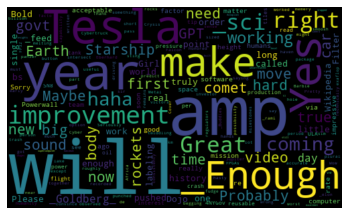

In [9]:
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# **Function to classify a tweet as positive, negative or neutral using Polarity**

In [10]:
# Function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,_sci This might sting a little …,0.500000,-0.187500,Negative
1,The “early investor” part of Tesla is wrong. ...,0.733333,-0.466667,Negative
2,"_sci Also, there could be long period comets t...",0.431429,0.033929,Positive
3,_sci Pretty much,0.600000,0.225000,Positive
4,Cybertruck option package,0.000000,0.000000,Neutral
...,...,...,...,...
95,"And why aim your attacks at Tesla, when we’re...",0.437500,0.187500,Positive
96,That bs was pushed by oil &amp; gas interests...,0.100000,0.000000,Neutral
97,1 4NYGov @28delayslater 🎯,0.000000,0.000000,Neutral
98,4NYGov Good analysis. He also includes a govt...,0.303000,0.147000,Positive


# **Printing positive tweets**


In [11]:
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) _sci Also, there could be long period comets that intersect Earth right now. We just haven’t observed them during humanity’s (very short) recorded history. Comet S-L 9 punched a roughly Earth-sized hole in Jupiter. 

2) _sci Pretty much

3)   Wow

4)  That’s a great one

5)  Bold move, sir, bold move

6)    Thank you, Tesla is most honored!

7)   Very real possibility

8) History is written by the victors … except on Wikipedia haha

9)  Yes. Probably more accurate to say Great Filters plural.

10) We must pass The Great Filter

11) Sounds right 

12) A truly useful exaflop at de facto FP32

13)  _feed Metal has a fudge-like consistency near its melting point, so you can just smoosh it together

14)   _Enough   A lot of work remains. Technically, we have it working in sim with FPGAs at ~0.01% capability. This will be a true supercomputer.

15) _Enough   Your insights over the years have been excellent. That’s approximately right.

16)  Absolutely, but it do

# **Printing Negative Tweets**

In [12]:
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1)  _sci This might sting a little …

2)  The “early investor” part of Tesla is wrong. That bs has been pushed by Eberhard (worst person I’ve ever worked with and that’s saying something!) for years.

3) _rami   Seriously

4)  _Enough  This is out of our hands, so hard to predict. Maybe on order of 10 billion km of real world driving will be enough to convince regulators.

5) _Enough   Autopilot was trapped in a local maximum, labeling single camera images uncorrelated in time. Now, it is not.

6)  I want to do electric vtol supersonic sooo bad, but my brain will overload

7)    Sorry, this is embarrassingly late. Two factor authentication via sms or authenticator app is going through final validation right now.

8)  The FSD improvement will come as a quantum leap, because it’s a fundamental architectural rewrite, not an incremental tweak. I drive the bleeding edge alpha build in my car personally. Almost at zero interventions between home &amp; work. Limited

# **Plot of Polarity vs Subjectivity**

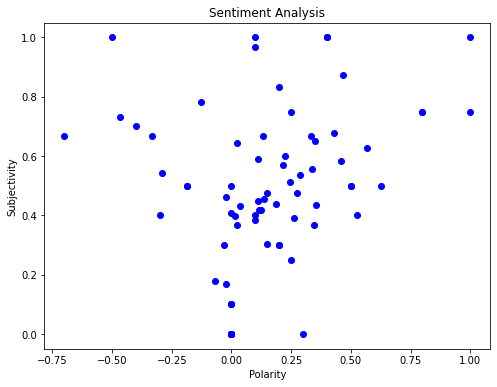

In [13]:
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

# **% of Positive tweets**

In [14]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

48.0

# **% of Negative Tweets**

In [15]:
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)


14.0

In [16]:
# Value Counts
df['Analysis'].value_counts()

Positive    48
Neutral     38
Negative    14
Name: Analysis, dtype: int64

# **Plotting and visualizing the counts**

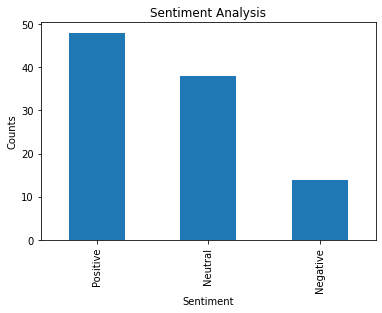

In [17]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()